In [1]:
import numpy as np
import math

import matplotlib.pyplot as plt 

import sys

# Курсовая работа 

## Расчет нестационарного нагревания стенок неохлаждаемого реактивного сопла

#### 0. ОСНОВНЫЕ ИСХОДНЫЕ ДАННЫЕ ДЛЯ РАСЧЕТА:

In [2]:
M_sr = 5 # число М на срезе сопла (3M, 6kgs), (4, 6), (5, 6), (3, 5) (4, 5) (5, 5), (3, 4), (4, 4), (5, 4) 
nu = 10 # Полуугол раствора конического сопла, град.
G = 5 # Массовый расход через сопло, кг/с.
p_0 = 1.98e6 # Давление в камере сгорания, Па.
k = 1.33 #	Показатель адиабаты для продуктов сгорания
T_0 = 2500 # Температура торможения, К.
t = 10 # Время работы двигателя, с.
T_n = 273 # Начальная температура стенок сопла, К.
R = 287 # Универсальная газовая постоянная для воздуха

M_vh = 0.1 # Число M на входе.
mu = 20e-6 # Па*с коэффициент динамической вязкости
lam_t = 7.696e-2 # Вт*(м*К) - коэффициент теплопроводности газа

ro_m = 11500 # кг/м^3 Плотность материала стенки (вольфрамовый сплав)
lam_m = 136.5 # Вт/(м*К) Коэффициент теплопроводности материала стенки (вольфрамовый сплав)
c_m = 950 # Дж/(кг*К) теплоемкость материала стенки (вольфрамовый сплав)

T_pl = 2200 # К - температура плавления материала стенки (вольфрамовый сплав)


$$M_{вх} = 0.1$$

$$\mu = 20\cdot10^{-6}$$

$$\lambda_t = 7.696\cdot10^{-2}$$

$$\rho_{м} = 11500$$
$$\lambda_{м} = 136.5$$

$$c_{м} = 950$$

$$T_{пл} = 2200$$


#### 1. Газодинамический расчет

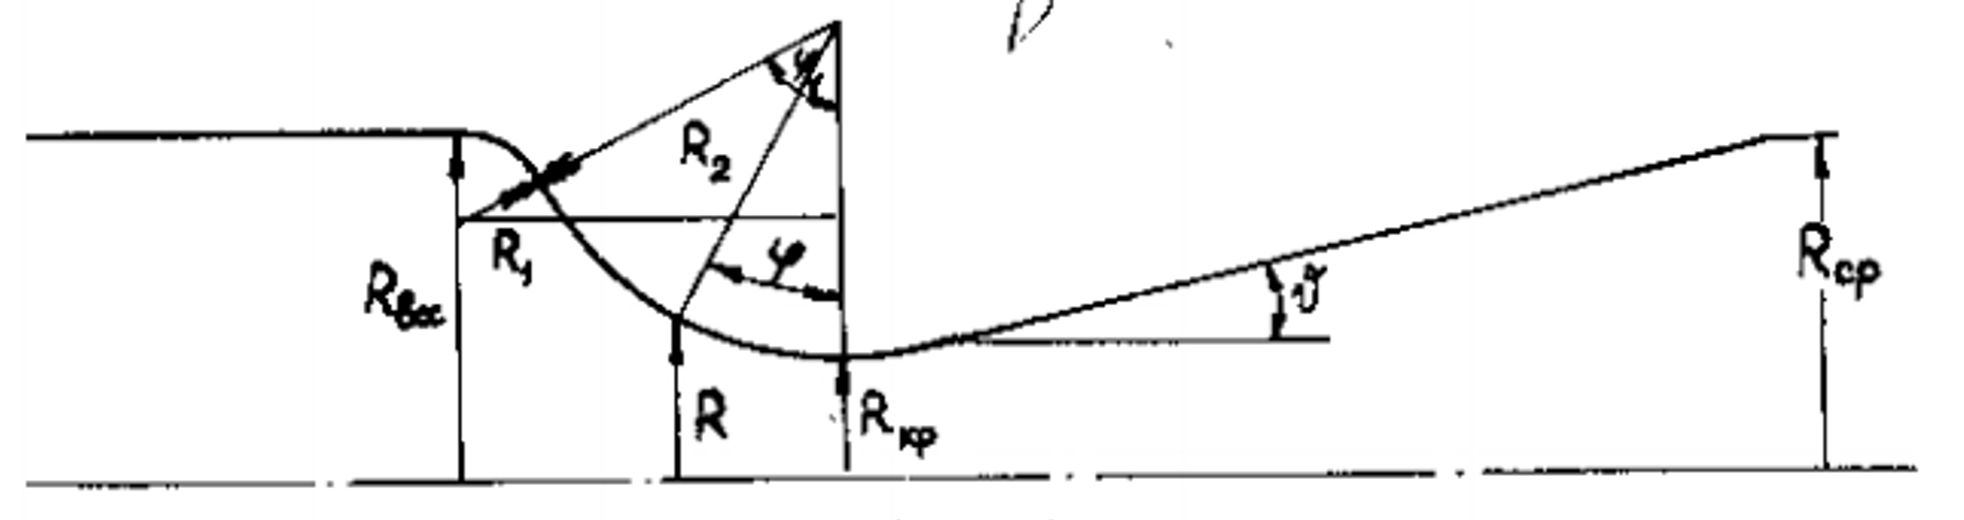

1.1 Радиусы закруглений сопла:

$$R_1 = 0.63R_{кр}$$
$$R_2 = 3R_{кр}$$

Длина входной части сопла:

$$l_1 = 3R_{вх}$$

Находим площадь и радиус критического сечения.
Для этого запишем уравнение расхода

$$G = \frac{p_0 F_{кр}}{\sqrt{T_0}}m$$

,где $$m = \sqrt{\frac{2}{k+1}^{\frac{k+1}{k-1}}\cdot\frac{k}{R}}$$

Тогда $$F_{кр} = \frac{G \sqrt{T_0}}{m p_0}$$
$$ R_{кр} = \sqrt{\frac{F_{кр}}{\pi}}

In [3]:
m = math.sqrt((2/(k+1))**((k+1)/(k-1))*(k/R))
m

0.03970399950943273

In [4]:
F_kr = G*math.sqrt(T_0)/(m*p_0)
R_kr = math.sqrt(F_kr/math.pi)
F_kr, R_kr

(0.0031800984239038505, 0.03181598289171791)

1.2 Площадь и радиус входного и выходного сечения

Из уравнения газовой функции:

$$\frac{F_{кр}}{F} = q(\lambda)$$

$$переводим \quad  M_{вх} \quad  в \quad  \lambda$$



In [5]:
def qlambda(nashe_lambda,k=1.4):
	q_lambda=nashe_lambda*pow(((k+1)/2),(1/(k-1)))*pow((1-((k-1)/(k+1))*pow(nashe_lambda,2)),(1/(k-1)))
	return q_lambda

In [6]:
def lam_Mlambda(M_lambda,k):
	nashe_lambda=pow((((k+1)/2)*pow(M_lambda,2)/(1+((k-1)/2)*pow(M_lambda,2))),0.5)
	return nashe_lambda

In [7]:
def qM(M, k=1.4):
    lam = lam_Mlambda(M, k)
    return qlambda(lam, k)


In [8]:
F_vh = F_kr/qM(M_vh)
R_vh = math.sqrt(F_vh/math.pi)
F_vh, R_vh

(0.018513988432113125, 0.07676708637582871)

In [9]:
F_sr = F_kr/qM(M_sr)
R_sr = math.sqrt(F_sr/math.pi)
F_sr, R_sr

(0.07950246059759623, 0.15907991445858952)

1.3 Расчет длины сопла по образующей

$$l = l_{ц} + l_{д} + l_{c}$$

$$l_{ц} = l_1$$

$$l_{д} = R_1\phi_{н} + R_2\phi_{н}$$

$$\cos \phi_{н} = \frac{R_2 + R_{кр} - (R_{вх} - R_1)}{R_1 + R_2}$$

$$l_{с} = \frac{R_{ср} - R_{кр}}{\sin \nu}

Длина сопла по оси симметрии

$$ x = l_{ц} + x_{д} + x_{с}$$

$$x_{д} = (R_1 + R_2)\sin \phi_{н}$$

$$x_{с} = \frac{R_{ср} - R_{кр}}{tg \nu}$$



In [10]:
l_1 = 3*R_vh

R_1 = 0.63*R_vh
R_2 = 3*R_vh

cos_fi_n = (R_2 + R_kr - (R_vh - R_1))/(R_1 + R_2)

fi_n = math.acos(cos_fi_n)

# fi_n = math.asin(1-(R_vh - R_kr)/(R_1 + R_2))

l_d = R_1*fi_n + R_2*fi_n

l_s = (R_sr - R_kr)/math.sin(math.pi*nu/180)

l = l_1 + l_d + l_s
l

x_d = (R_1 + R_2)*math.sin(fi_n)
x_s = (R_sr - R_kr)/math.tan(math.pi*nu/180) 
x = l_1 + x_d + x_s

1.4 Расчет длины сопла до расчетного сеченя в дозвуковой части сопла

$$l_{р} = l_{ц} + l_{д,р}$$

$$l_{д,р} = R_1 \phi_{н} + R_2(\phi_{н} - \phi)$$

$$\cos \phi = \frac{R_2 - (R - R_{кр})}{R_2}$$

In [11]:
# Сделаем функцию для расчета текущей длины
def get_l_R(R):

    cos_fi = (R_2 -(R - R_kr))/R_2

    fi = math.acos(cos_fi)

    l_d_r = R_1*fi_n + R_2*(fi_n - fi)

    return l_1 + l_d_r

1.5 Параметры потока на внешней границе пограничного слоя, образующегося на стенках сопла

$$\frac{p_0}{p} = \frac{1}{\pi(\lambda)}$$

$$\frac{T_0}{T} = \frac{1}{\tau(\lambda)}$$

$$\frac{\rho_0}{\rho} = \frac{1}{\epsilon(\lambda)}$$

In [12]:
# определим газовые функции

def pilambda(nashe_lambda,k=1.4):
	pi_lambda=pow((1-((k-1)/(k+1))*pow(nashe_lambda,2)),(k/(k-1)))
	return pi_lambda

def taulambda(nashe_lambda,k=1.4):
	tau_lambda=1-((k-1)/(k+1))*pow(nashe_lambda,2)
	return tau_lambda

def epslambda(nashe_lambda,k=1.4):
	eps_lambda=pow((1-((k-1)/(k+1))*pow(nashe_lambda,2)),(1/(k-1)))
	return eps_lambda

In [13]:
# Определим запвисимости параметров от M 
def get_p_M(M):
    lam = lam_Mlambda(M, k)
    return p_0*pilambda(lam, k)

def get_T_M(M):
    lam = lam_Mlambda(M, k)
    return T_0*taulambda(lam, k)

def get_ro_M(M):
    lam = lam_Mlambda(M, k)
    return p_0/(R*T_0)*epslambda(lam, k)

#### 2. Расчет теплообмена между газом и внутренней поверхностью сопла

Из числа Нуссельта можно определить зависимость коэффициента теплоотдачи от x

$$Nu = \frac{\alpha\chi_{эф}}{\lambda_{\omega}} = 0.0296 Re_{\chi_{эф\omega}}^{0.8}Pr_{\omega}^{0.43}\left(\frac{T_{\omega}}{T_e}\right)^{0.4}\left(1+\frac{k+1}{2}rM^2\right)^{0.11}$$

$$Выражаем\quad \alpha$$

$$\alpha(x) = \frac{0.0296 \lambda_{\omega} Re_{\chi_{эф\omega}}^{0.8}Pr_{\omega}^{0.43}\left(\frac{T_{\omega}}{T_e}\right)^{0.4}\left(1+\frac{k+1}{2}rM^2\right)^{0.11}}{\chi_{эф}}$$

где 
$$T_{\omega} = \frac{T_{доп} + T_e}{2}$$

$$Re_{\chi_{эф\omega}} = \frac{\rho_{\omega} u_{\omega}}{\mu_{\omega}}, \quad \rho_{\omega} - плостность\quad газа,\quad u_{\omega} - скорость\quad газа, \quad\mu_{\omega} - вязкость\quad газа$$

$$Pr_{\omega} = \frac{\mu_{\omega} c_p}{\lambda_{\omega}}, \quad c_p - теплоемкость\quad газа,\quad \lambda_{\omega} - теплопроводность\quad газа, \quad\mu_{\omega} - вязкость\quad газа$$

$$\chi_{эф} = \frac{\int_0^l \rho(x) v(x) R(x)^{\frac{5}{4}} dx}{\rho_{\omega}v_{\omega}R_{\omega}^{\frac{5}{4}}}$$

$$T_e = T_{\omega}\left(1 + \frac{k-1}{2}rM^2\right), \quad r = 0.89$$

 

In [14]:
# Зададим количество точек расчета
N = 100

# Зададим линейные размеры
l_0 = 0
T_dop = T_pl - 50

# Массив точек расчета
ar_x = np.linspace(l_0, l, N)

In [15]:
# Определим радиус сечения в зависимости от x
R_x = []
fi_n = math.asin(1-(R_vh - R_kr)/(R_1 + R_2))

for x_i in ar_x:
    if x_i < l_1:
        R_x.append(R_vh)
    elif x_i < l_1 + R_1*math.cos(fi_n):
        x_r_i = x_i - l_1
        fi = math.acos(x_r_i/R_1)
        R_x.append(R_vh - R_1*(1 - math.sin(fi)))
    elif x_i < l_1 + x_d:
        x_r_i = x_d - x_i + l_1
        fi = math.acos(x_r_i/R_2)
        R_x.append(R_kr + R_2*(1 - math.sin(fi)))
    else:
        R_x.append(R_kr + (x_i - l_1 - x_d)*math.tan(math.pi*nu/180))

R_x = np.array(R_x)

Text(0.5, 1.0, 'График засивимости радиуса сечения вдоль его длины')

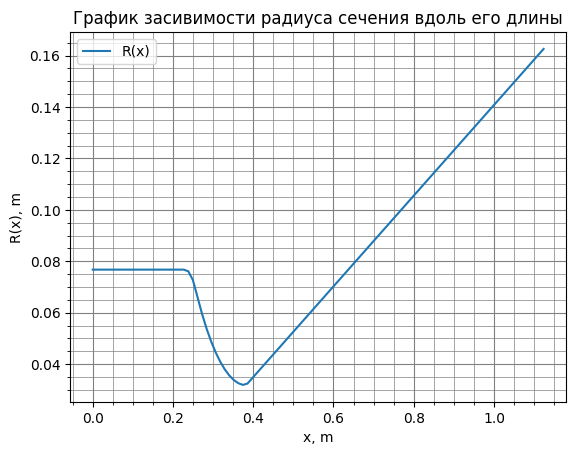

In [16]:
plt.plot(ar_x, R_x, label='R(x)')
plt.grid(True, which='major', linewidth=0.8, color='gray')
plt.grid(True, which='minor', linewidth=0.5, color='gray')

plt.xlabel('x, m')
plt.ylabel('R(x), m')

plt.legend()

plt.minorticks_on()

plt.title('График засивимости радиуса сечения вдоль его длины')

In [17]:
# Посчитаем площадь сечений от x
F_x = np.pi*R_x**2

In [18]:
# Рассчитаем скорость в зависимости от x

def lam_qlambda(q_lambda,k):
	a=0
	b=1
	c=2.5
	d=0.0000001
	epsln=0.00001
	pogreshnost=1
	nashe_lambda=a+d
	if q_lambda==0:
		q_lambda==d
	while pogreshnost>epsln:
		F=((k+1)/(k-1))*pow(nashe_lambda,(k-1))-pow(nashe_lambda,(k+1))-2*pow(q_lambda,(k-1))/(k-1)
		F_1=(k+1)*(pow(nashe_lambda,(k-2))-pow(nashe_lambda,k))
		F_2=(k+1)*(k-2)*pow(nashe_lambda,(k-3))-k*(k+1)*pow(nashe_lambda,k-1)
		obraz_x=nashe_lambda
		nashe_lambda=nashe_lambda-F/F_1
		pogreshnost=abs(obraz_x-nashe_lambda)
	rez=[]
	rez.append(abs(nashe_lambda))
	nashe_lambda=b+d
	pogreshnost=1
	while pogreshnost>epsln:
		F=((k+1)/(k-1))*pow(nashe_lambda,(k-1))-pow(nashe_lambda,(k+1))-2*pow(q_lambda,(k-1))/(k-1)
		F_1=(k+1)*(pow(nashe_lambda,(k-2))-pow(nashe_lambda,k))
		F_2=(k+1)*(k-2)*pow(nashe_lambda,(k-3))-k*(k+1)*pow(nashe_lambda,k-1)
		obraz_x=nashe_lambda
		nashe_lambda=nashe_lambda-F/F_1
		pogreshnost=abs(obraz_x-nashe_lambda)
	rez.append(abs(nashe_lambda))
	return rez

def Mlambda(nashe_lambda, k=1.4):
	M_lambda=pow(((2/(k+1))*pow(nashe_lambda,2)/(1-((k-1)/(k+1))*pow(nashe_lambda,2))),0.5)
	return M_lambda


In [19]:
q_lambda = F_kr/F_x

lam_x = []
for i, q_l in enumerate(q_lambda):
    # print(i, q_l)
    lam_2 = lam_qlambda(q_l, k)
    if ar_x[i] < l_1 + x_d:
        lam_x.append(lam_2[0])
    else:
        lam_x.append(lam_2[1])

lam_x = np.array(lam_x)
M_x = Mlambda(lam_x, k)
T_x = T_0*taulambda(lam_x)

T_w = (T_pl + T_0)/2


v_x = M_x*np.sqrt(k*R*T_x)

Text(0.5, 1.0, 'График засивимости скорости газа вдоль его длины')

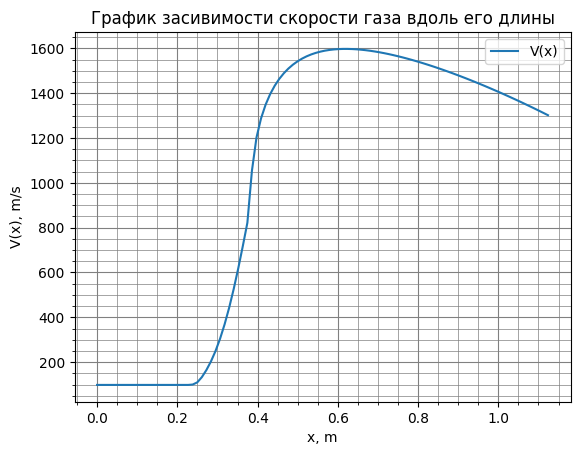

In [20]:
plt.plot(ar_x, v_x, label='V(x)')
plt.grid(True, which='major', linewidth=0.8, color='gray')
plt.grid(True, which='minor', linewidth=0.5, color='gray')

plt.xlabel('x, m')
plt.ylabel('V(x), m/s')

plt.legend()

plt.minorticks_on()

plt.title('График засивимости скорости газа вдоль его длины')

In [21]:
# Посчитаем плотность от x
ro_x = get_ro_M(M_x)

Text(0.5, 1.0, 'График засивимости плотности газа вдоль его длины')

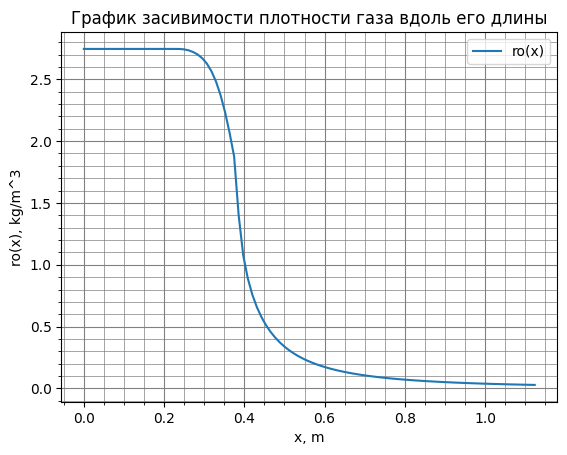

In [22]:
plt.plot(ar_x, ro_x, label='ro(x)')
plt.grid(True, which='major', linewidth=0.8, color='gray')
plt.grid(True, which='minor', linewidth=0.5, color='gray')

plt.xlabel('x, m')
plt.ylabel('ro(x), kg/m^3')

plt.legend()

plt.minorticks_on()

plt.title('График засивимости плотности газа вдоль его длины')

In [23]:
#  Посчитаем x эф
def get_x_ef(i):

    x_hist = ar_x[:i+1]

    sum_int = 0
    for ii in range(len(x_hist)-1):
        
        delta_x = x_hist[ii+1] - x_hist[ii]

        ff_i = ro_x[ii]*v_x[ii]*R_x[ii]**(5/4)
        ff_ip1 = ro_x[ii+1]*v_x[ii+1]*R_x[ii+1]**(5/4)

        ff = (ff_i + ff_ip1)/2

        sum_int += ff*delta_x

    res = sum_int/(ro_x[i]*v_x[i]*R_x[i]**(5/4))
    if not res:
        res = ar_x[i]

    return res
        
        

In [24]:
x_ef = []
for i in range(N):
    x_ef.append(get_x_ef(i))

x_ef = np.array(x_ef)

x_ef[0] = 1e-9

Text(0.5, 1.0, 'График засивимости эффективной длины сопла от его длины')

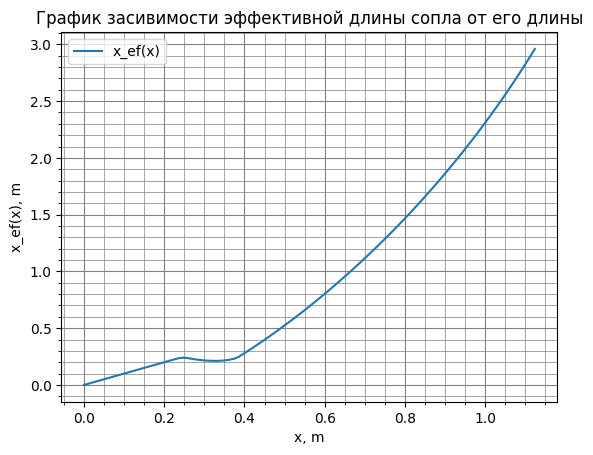

In [25]:
plt.plot(ar_x, x_ef, label='x_ef(x)')
plt.grid(True, which='major', linewidth=0.8, color='gray')
plt.grid(True, which='minor', linewidth=0.5, color='gray')

plt.xlabel('x, m')
plt.ylabel('x_ef(x), m')

plt.legend()

plt.minorticks_on()

plt.title('График засивимости эффективной длины сопла от его длины')

In [26]:
# Посчитаем Re от x
Re_x = ro_x*v_x*x_ef/mu

Text(0.5, 1.0, 'График засивимости Re(x)')

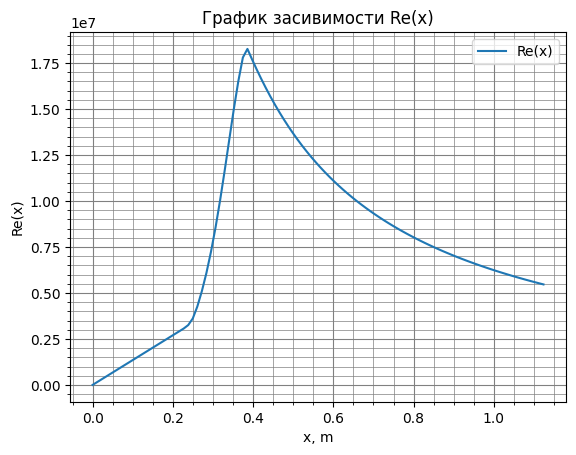

In [27]:
plt.plot(ar_x, Re_x, label='Re(x)')
plt.grid(True, which='major', linewidth=0.8, color='gray')
plt.grid(True, which='minor', linewidth=0.5, color='gray')

plt.xlabel('x, m')
plt.ylabel('Re(x)')

plt.legend()

plt.minorticks_on()

plt.title('График засивимости Re(x)')

In [28]:
# Посчитаем Pr от x
c_p = 1e3 # Дж/(кг*К), для воздуха

Pr_x = mu*c_p/lam_t
Pr_x

0.2598752598752599

In [29]:
# Рассчитаем температуру стенки
r_v = 0.89
T_e_x = T_x*(1+((k-1)/2)*r_v*M_x**2)

Text(0.5, 1.0, 'График зависимости температуры стенки от x')

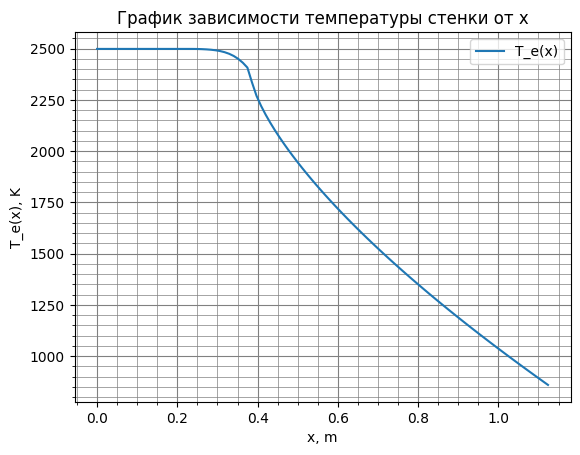

In [30]:
plt.plot(ar_x, T_e_x, label='T_e(x)')
plt.grid(True, which='major', linewidth=0.8, color='gray')
plt.grid(True, which='minor', linewidth=0.5, color='gray')

plt.xlabel('x, m')
plt.ylabel('T_e(x), K')

plt.legend()

plt.minorticks_on()

plt.title('График зависимости температуры стенки от x')

In [31]:
# Рассчитаем коэффициент теплоотдачи от x
alpha_x = 0.0296*lam_t*Re_x**0.8*Pr_x**0.43*(T_w/T_e_x)**0.4*(1+((k-1)/2)*r_v*M_x**2)**0.11/x_ef
alpha_x[0] = alpha_x[1]

Text(0.5, 1.0, 'График коэффициента теплоотдачи от x')

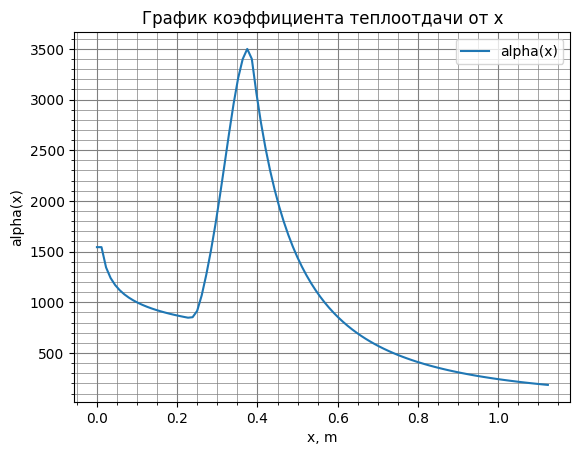

In [32]:
plt.plot(ar_x, alpha_x, label='alpha(x)')
plt.grid(True, which='major', linewidth=0.8, color='gray')
plt.grid(True, which='minor', linewidth=0.5, color='gray')

plt.xlabel('x, m')
plt.ylabel('alpha(x)')

plt.legend()

plt.minorticks_on()

plt.title('График коэффициента теплоотдачи от x')

#### 3. Тепловой расчет стенки сопла

Рассчитаем распределение температуры в стенке сопла. 

Расчет будет выполнен численно, явным методом.

Рассчитаем распределение температуры на каждом участке стенки, для нескольких толщин, в результате расчета подберем оптимальную толщину, когда максимальное значение температуры стенки равно или немного меньше максимально допустимой температуры.

Явный численный метод

$$Стенку \quad делим \quad на \quad промежутки \quad \Delta x$$

Для внутреннего слоя k на шаге по времени n + 1 

$$ T_k^{n+1} = F_0(T_{k+1}^n + T_{k-1}^n) + (1 - 2F_0)T_k^n$$

$$ Где \quad критерий \quad Фурье \quad F_0 = \frac{\lambda \Delta \tau}{\Delta x^2 c \rho}$$

$$ \lambda \quad - \quad коэффициент \quad теплолпроводности \quad стенки$$ 
$$ \Delta \tau - \quad шаг \quad по \quad времени$$ 
$$ \Delta x - \quad шаг \quad по \quad толщине \quad стенки$$ 
$$ с - \quad удельная \quad теплолемкость \quad стенки$$
$$ \rho - \quad плотность \quad материала \quad стенки$$



Для крайнего слоя на шаге по времени n + 1 

$$ T_1^{n+1} = 2F_0(T_2^n + BiT_n^f) + (1 - 2F_0-2F_0Bi)T_k^1$$

$$ Где \quad критерий \quad Био \quad Bi = \frac{\alpha \Delta x}{\lambda}$$

$$ \lambda \quad - \quad коэффициент \quad теплопередачи \quad участка \quad стенки$$ 

Условия устойчивости решения:

$$F_0 < \frac{1}{2}$$

$$Bi \geq 0$$

In [33]:
## Посчитаем теплопроводность для 0 го элемента для определенной толщины стенки

In [34]:
def calculate_temp_x_step(ind_x, d, n_t):
    
    n_d = 10
    delta_d =  2*d/n_d

    # n_t = 5000 # Шаг подбирается исходя из F_0 <= 0.5
    delta_t = t/n_t

    F_0 = lam_m*delta_t/(delta_d**2*c_m*ro_m)

    Bi = alpha_x[ind_x]*delta_d/lam_m

    assert F_0 <= 0.5, 'F_0 = {} > 0.5'.format(F_0)
    assert 1 - 2*F_0 - 2*F_0*Bi > 0, '1 - 2*F_0 - 2*F_0*Bi = {} <= 0'.format(1 - 2*F_0 - 2*F_0*Bi)

    # print(d, F_0, 1 - 2*F_0 - 2*F_0*Bi)

    Bi = alpha_x[ind_x]*delta_d/lam_m

    T_t_x = np.zeros((n_t, n_d))
    T_t_x[0] = T_n

    # T_t_x[0, 0] = 2*F_0*(T_n + Bi*T_e_x[ind_x]) + (1 - 2*F_0 - 2*F_0*Bi)*T_n
    # T_t_x[0, n_d-1] = 2*F_0*(T_n + Bi*T_e_x[ind_x]) + (1 - 2*F_0 - 2*F_0*Bi)*T_n

    for c_ind_t in range(1, n_t):

        T_t_x[c_ind_t, 0] = 2*F_0*(T_t_x[c_ind_t-1, 1] + Bi*T_e_x[ind_x]) + (1 - 2*F_0 - 2*F_0*Bi)*T_t_x[c_ind_t-1, 0]
        T_t_x[c_ind_t, n_d-1] = 2*F_0*(T_t_x[c_ind_t-1, n_d-2] + Bi*T_e_x[ind_x]) + (1 - 2*F_0 - 2*F_0*Bi)*T_t_x[c_ind_t-1, n_d-1]

        for c_ind_x in range(1, n_d-1):
            T_t_x[c_ind_t, c_ind_x] = F_0*(T_t_x[c_ind_t-1, c_ind_x+1] + T_t_x[c_ind_t-1, c_ind_x-1]) + (1-2*F_0)*T_t_x[c_ind_t-1, c_ind_x]

    return T_t_x

In [35]:
# d_s = [(0.001, 26000), (0.0013, 25000), (0.0015, 20000), (0.0017, 15000), (0.0016, 12000), (0.002, 7000), (0.0025, 5000), (0.003, 3000)] 

d_0 = 0.0017
d_d_s = 0.0001

n_t_0 = 10000

T_max_x = []
T_in_x = []
d_x = []

d = d_0

R_prev = 0
d_prev = 0

print('0 % [>' + ' '*9 + ']', end = '\r')
sys.stdout.flush()

for i in range(len(ar_x)):

    print('{} % ['.format(i+1) + '-'*(int(i/10)) + '>' + ' '*(9 - int(i/10)) + ']', end = '\r')
    sys.stdout.flush()

    T_max = 0
    T_max_prev = 0
    T_in_prev = 0
    T_in = 0

    if d_prev:
        d = d_prev

    first_it = True
    increase = None

    while True:

        d = round(d, 4)

        if d == 0:
            break
        elif first_it and d == 0.0001:
            d = 0.0002
        elif d == d_prev:
            d += d_d_s

        n_t = n_t_0 + int(800*(d_0/d)**2.5)

        T_max_prev = T_max
        T_in_prev = T_in

        T_t_x = calculate_temp_x_step(i, d, n_t)
        T_max = T_t_x[-1].max()

        d_prev = d

        T_in = T_t_x[-1, 4]

        # print(i, d, T_max, T_in, n_t)

        if first_it:
           increase = T_max >= T_dop 
        else:
            if increase and T_max < T_dop:
                break
            elif not increase and T_max >= T_dop:
                break

        if increase:
            d += d_d_s
        else:
            d -= d_d_s

        first_it = False

    # print(min(T_max, T_max_prev), min(T_in, T_in_prev))

    T_max_x.append(min(T_max, T_max_prev))
    T_in_x.append(min(T_in, T_in_prev))
    d_x.append(d if increase else d_prev)


d_x = np.array(d_x)
T_in_x = np.array(T_in_x)



Text(0.5, 1.0, 'График засивимости толщины сопла вдоль его длины')

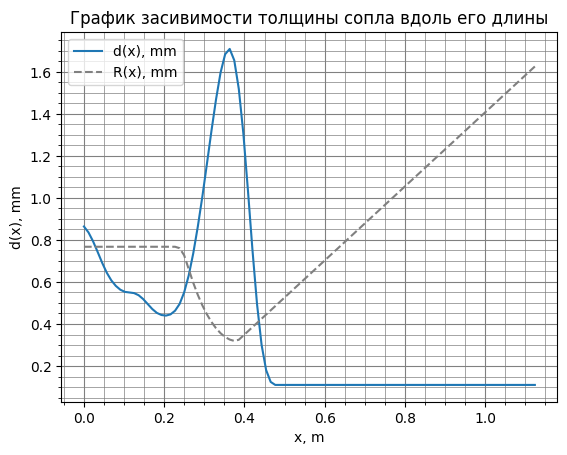

In [36]:
ar_x_add = [ar_x[0] - (ar_x[1] - ar_x[0])]
d_x_add = [d_x[0]]
for i in range(19):
    ar_x_add.append(ar_x_add[-1] - (ar_x[1] - ar_x[0]))
    d_x_add.append(d_x[0])

ar_x_add_2 = [ar_x[-1] + (ar_x[1] - ar_x[0])]
d_x_add_2 = [d_x[-1]]

for i in range(19):
    ar_x_add_2.append(ar_x_add_2[-1] + (ar_x[1] - ar_x[0]))
    d_x_add_2.append(d_x[-1])    

ar_x_new = np.array(ar_x_add + list(ar_x) + ar_x_add_2)
d_x_new  = np.array(d_x_add + list(d_x) + d_x_add_2)

ii = ar_x_new.argsort()
ar_x_new = ar_x_new[ii]
d_x_new = d_x_new[ii]

w=np.hanning(10)
d_x_smooth=np.convolve(w/w.sum(), d_x_new, mode='same')

d_x_smooth = d_x_smooth[20:N+20]*1.1

plt.plot(ar_x, d_x_smooth*1000, label='d(x), mm')
plt.plot(ar_x, R_x*10, label='R(x), mm', color='gray', linestyle='--')

plt.grid(True, which='major', linewidth=0.8, color='gray')
plt.grid(True, which='minor', linewidth=0.5, color='gray')

plt.xlabel('x, m')
plt.ylabel('d(x), mm')

plt.legend()

plt.minorticks_on()

plt.title('График засивимости толщины сопла вдоль его длины')

Text(0.5, 1.0, 'График зависимости температуры внутри стенки сопла вдоль его длины')

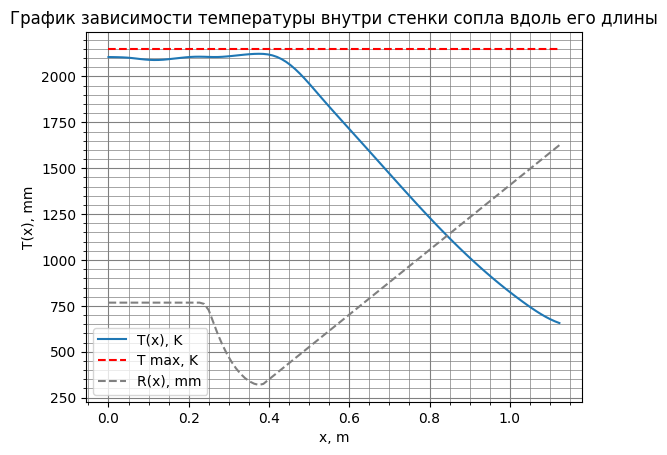

In [37]:
w=np.hanning(20)

T_in_x_add = 20*[T_in_x[0]]
T_in_x_add_2 = 20*[T_in_x[-1]]

T_in_x_new  = np.array(T_in_x_add + list(T_in_x) + T_in_x_add_2)

T_in_x_smooth = np.convolve(w/w.sum(), T_in_x_new, mode='same')
T_in_x_smooth = T_in_x_smooth[20:N+20]

T_dop_x = np.ones_like(T_in_x)*T_dop

plt.plot(ar_x, T_in_x_smooth, label='T(x), K')
plt.plot(ar_x, T_dop_x, label='T max, K', color='red', linestyle='--')
plt.plot(ar_x, R_x*10000, label='R(x), mm', color='gray', linestyle='--')

plt.grid(True, which='major', linewidth=0.8, color='gray')
plt.grid(True, which='minor', linewidth=0.5, color='gray')

plt.xlabel('x, m')
plt.ylabel('T(x), mm')

plt.legend()

plt.minorticks_on()

plt.title('График зависимости температуры внутри стенки сопла вдоль его длины')

Из графика видно, что оптимальная толщина стенки для нашего случая d=0.0017 м = 1.7 мм,
температура стенки при этом нигде не привышает максимально допустимую.